# Manifold Learning: t-SNE and UMAP for Equity Return

This notebook explores how [t-SNE](https://lvdmaaten.github.io/tsne/) and UMAP perform on equity returns.

## Imports & Settings

In [ ]:
from pathlib import Path
from os.path import join
import pandas as pd
import numpy as np
from numpy.random import choice, randint, uniform, randn
import seaborn as sns
import matplotlib.pyplot as plt
import ipyvolume as ipv
from sklearn.datasets import fetch_openml, make_swiss_roll, make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import colorlover as cl

In [2]:
%matplotlib inline
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format

## Load equity returns

In [3]:
idx = pd.IndexSlice
with pd.HDFStore('../../data/assets.h5') as store:
    returns = (store['quandl/wiki/prices']
               .loc[idx['2000':'2018', :], 'adj_close']
               .unstack('ticker')
               .resample('W')
               .last()
               .pct_change())

In [4]:
returns = returns.dropna(thresh=int(returns.shape[0] * .95), axis=1)
returns = returns.dropna(thresh=int(returns.shape[1] * .95))
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 951 entries, 2000-01-16 to 2018-04-01
Freq: W-SUN
Columns: 1890 entries, A to ZQK
dtypes: float64(1890)
memory usage: 13.7 MB


In [5]:
returns = returns.sample(n=250)
daily_avg = returns.mean(1)
returns = returns.apply(lambda x: x.fillna(daily_avg))

In [6]:
pca = PCA(n_components=2)

## T-Stochastic Neighbor Embedding (TSNE): Parameter Settings

### Perplexity: emphasis on local vs global structure

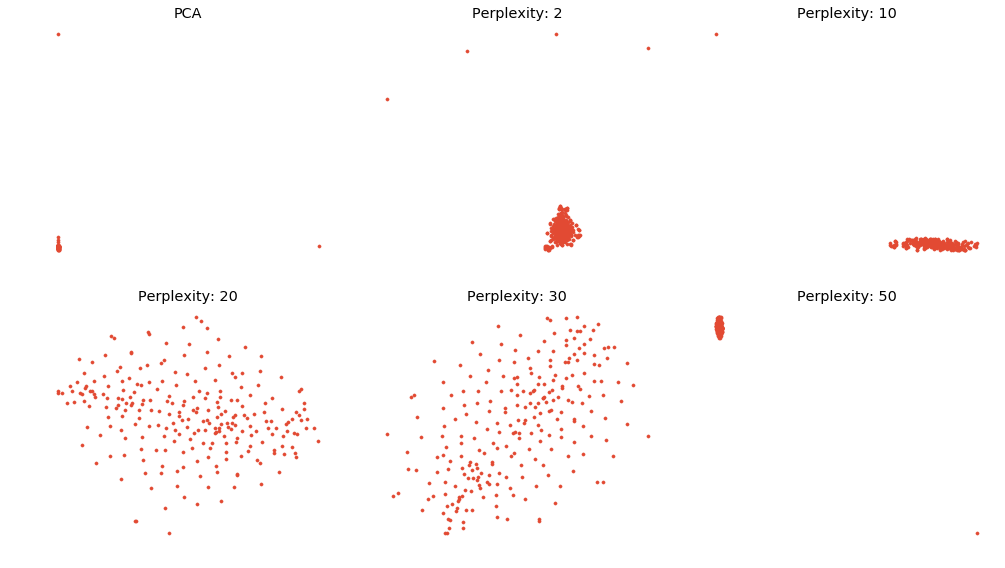

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
axes = axes.flatten()

axes[0].scatter(*pca.fit_transform(returns).T, s=10)
axes[0].set_title('PCA')
axes[0].axis('off')

for i, p in enumerate([2,10, 20, 30, 50], 1):
    embedding = TSNE(perplexity=p, n_iter=5000).fit_transform(returns)
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=10)
    axes[i].set_title('Perplexity: {:.0f}'.format(p))
    axes[i].axis('off')
fig.tight_layout()

### Convergence with `n_iter`

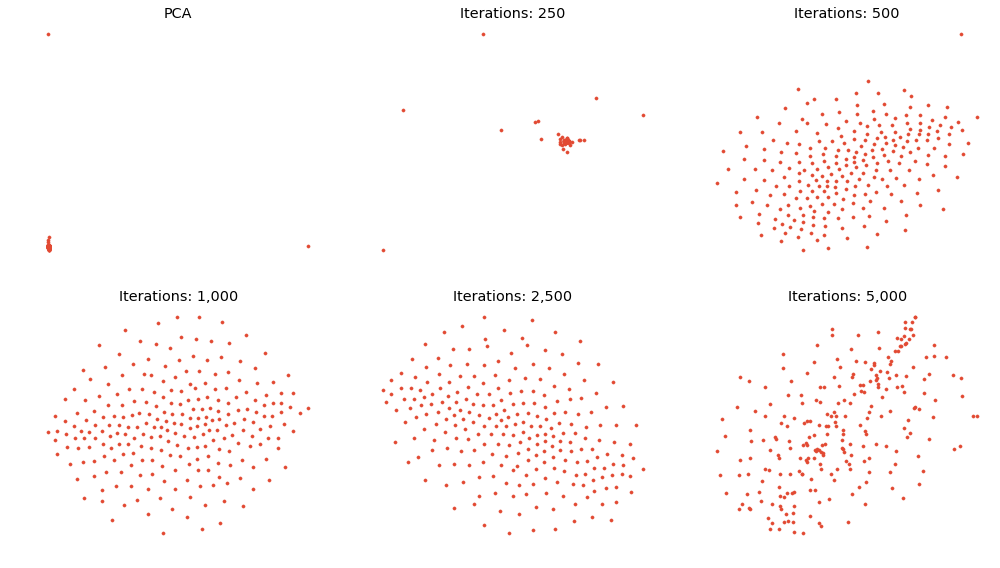

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axes = axes.flatten()
axes[0].scatter(*pca.fit_transform(returns).T, s=10)
axes[0].set_title('PCA')
axes[0].axis('off')

for i, n in enumerate([250, 500, 1000, 2500, 5000], 1):
    embedding=TSNE(perplexity=30, n_iter=n).fit_transform(returns)
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=10)
    axes[i].set_title('Iterations: {:,.0f}'.format(n))
    axes[i].axis('off')
fig.tight_layout()

## Uniform Manifold Approximation and Projection (UMAP): Parameter Settings

### Neighbors

/home/stefan/.pyenv/versions/miniconda3-latest/envs/ml4t/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning:

Embedding a total of 3 separate connected components using meta-embedding (experimental)



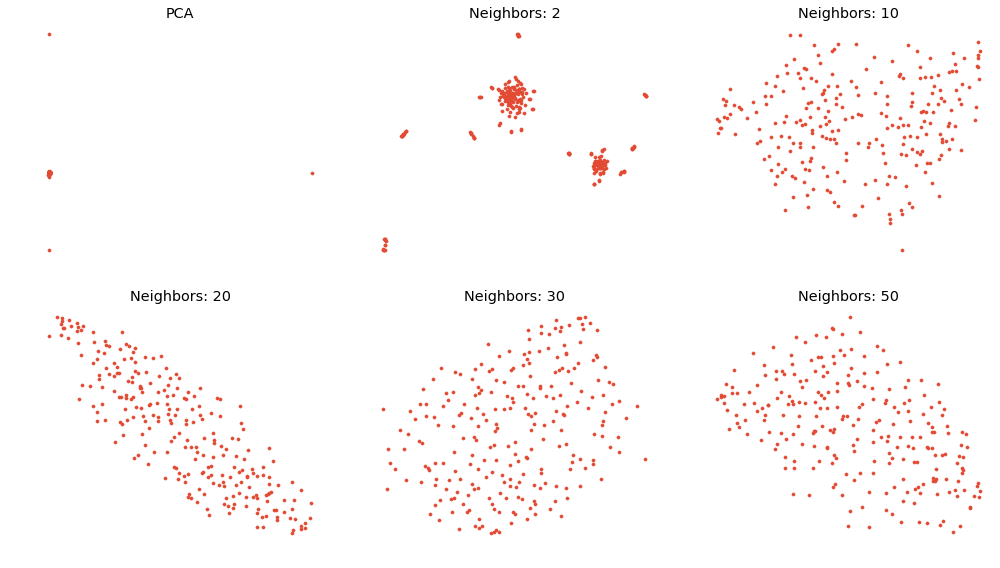

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
axes = axes.flatten()

axes[0].scatter(*pca.fit_transform(returns).T, s=10)
axes[0].set_title('PCA')
axes[0].axis('off')
for i, n in enumerate([2,10, 20, 30, 50], 1):
    embedding = umap.UMAP(n_neighbors=n, min_dist=0.1).fit_transform(returns)    
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=10)
    axes[i].set_title('Neighbors: {:.0f}'.format(n))
    axes[i].axis('off')
fig.tight_layout()  

### Minimum Distance

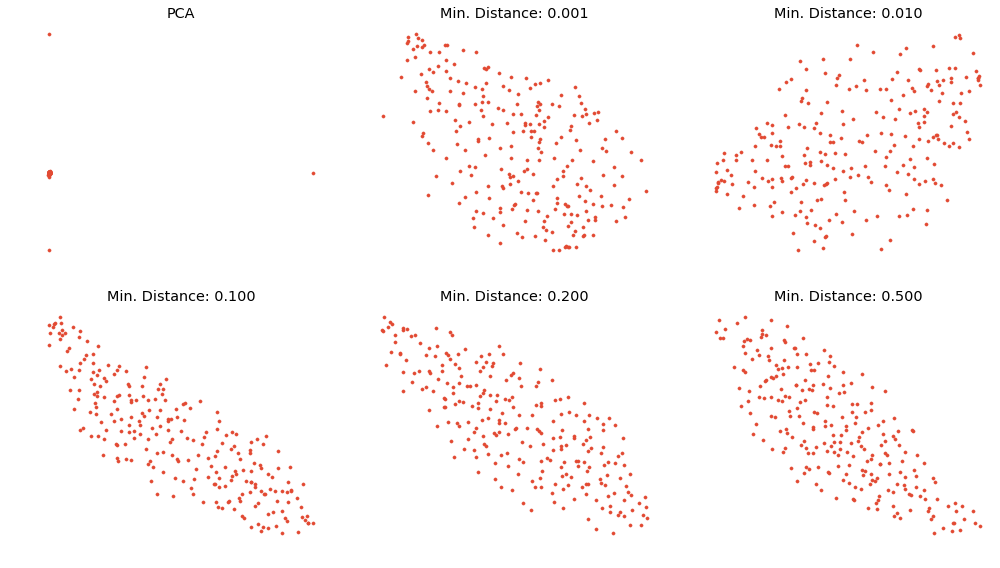

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
axes = axes.flatten()

axes[0].scatter(*pca.fit_transform(returns).T, s=10)
axes[0].set_title('PCA')
axes[0].axis('off')

for i, d in enumerate([.001, .01, .1, .2, .5], 1):
    embedding = umap.UMAP(n_neighbors=30, min_dist=d).fit_transform(returns)
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=10)
    axes[i].set_title('Min. Distance: {:.3f}'.format(d))
    axes[i].axis('off')
fig.tight_layout()